In [1]:
# Load the Packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
data = pd.read_csv("Ecommerce Churn Prediction Data.csv")

# Display the first few rows of the dataframe
data.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,8411,2023-09-15 12:24:08,Home,298,3,2340,Credit Card,29,1.0,Barbara Patterson,29,Male,1
1,2103,2023-09-15 11:58:54,Electronics,286,4,3561,Credit Card,27,1.0,Brian Roberts,27,Male,0
2,36353,2023-09-15 11:55:25,Books,288,1,3983,Cash,58,0.0,Jean Wood,58,Female,0
3,9806,2023-09-15 11:52:59,Clothing,329,2,1519,PayPal,40,1.0,Rebecca Williams,40,Female,0
4,14198,2023-09-15 11:50:27,Books,95,3,792,PayPal,67,1.0,Heidi Brown,67,Male,0


In [3]:
# Drop duplicate columns
data = data.drop(columns=['Customer Name', 'Customer Age'])

In [4]:
# Handle missing values (if any)
data = data.dropna()

# Convert 'Purchase Date' to datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Display basic statistics
data.describe()


,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,48606.000000,48606,48606.000000,48606.000000,48606.000000,48606.000000,48606.000000,48606.000000
mean,24952.300354,2023-04-06 15:30:48.732235008,255.153746,3.000720,2729.295519,0.499527,43.861169,0.201292
min,1.000000,2022-10-25 04:06:08,10.000000,1.000000,101.000000,0.000000,18.000000,0.000000
25%,12508.250000,2023-01-16 02:19:53.500000,133.000000,2.000000,1481.000000,0.000000,30.000000,0.000000
50%,24985.000000,2023-04-06 23:24:01,255.000000,3.000000,2728.000000,0.000000,44.000000,0.000000
75%,37470.750000,2023-06-26 21:15:18.750000128,377.000000,4.000000,3973.000000,1.000000,57.000000,0.000000
max,49997.000000,2023-09-15 12:24:08,500.000000,5.000000,5350.000000,1.000000,70.000000,1.000000
std,14406.692864,NaN,141.426711,1.412838,1442.073501,0.500005,15.358626,0.400970


In [5]:
data.describe(include='O')

,Product Category,Payment Method,Gender
count,48606,48606,48606
unique,4,4,2
top,Books,Credit Card,Female
freq,14705,19422,24542


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Product Category'] = label_encoder.fit_transform(data['Product Category'])
data['Payment Method'] = label_encoder.fit_transform(data['Payment Method'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Extract date features
data['Purchase Month'] = data['Purchase Date'].dt.month
data['Purchase Day'] = data['Purchase Date'].dt.day
data['Purchase DayOfWeek'] = data['Purchase Date'].dt.dayofweek

# Drop the original 'Purchase Date' column
data = data.drop(columns=['Purchase Date'])

# Display the first few rows of the processed dataframe
data.head()



,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn,Purchase Month,Purchase Day,Purchase DayOfWeek
0,8411,3,298,3,2340,1,1.0,29,1,1,9,15,4
1,2103,2,286,4,3561,1,1.0,27,1,0,9,15,4
2,36353,0,288,1,3983,0,0.0,58,0,0,9,15,4
3,9806,1,329,2,1519,3,1.0,40,0,0,9,15,4
4,14198,0,95,3,792,3,1.0,67,1,0,9,15,4


<Axes: ylabel='count'>

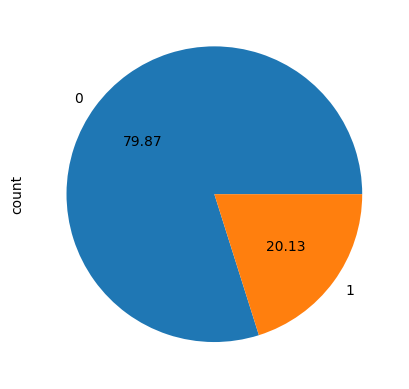

In [8]:
data['Churn'].value_counts().plot.pie(autopct='%.2f')

In [9]:
from sklearn.utils import resample
majority_class = data[data['Churn'] == 0]
minority_class = data[data['Churn'] == 1]

# Undersample the majority class
undersampled_majority = resample(majority_class,replace=False,n_samples=len(minority_class) * 2)

# Combine the undersampled majority class with the minority class
data = pd.concat([undersampled_majority, minority_class])
data

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn,Purchase Month,Purchase Day,Purchase DayOfWeek
28369,19463,1,396,5,2008,3,1.0,68,0,0,4,14,4
54156,42694,1,464,3,4394,1,1.0,45,1,0,11,26,5
15477,32870,1,11,1,1112,2,0.0,50,0,0,6,23,4
26989,33958,0,92,3,3557,1,1.0,46,1,0,4,22,5
40050,37864,0,146,5,4350,2,1.0,63,0,0,2,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,37928,0,100,5,4340,1,0.0,43,0,1,10,25,1
59988,822,0,482,4,588,1,1.0,23,0,1,10,25,1
59991,2875,1,246,1,4473,3,1.0,70,1,1,10,25,1
59992,28536,1,146,5,3051,3,1.0,43,1,1,10,25,1


<Axes: ylabel='count'>

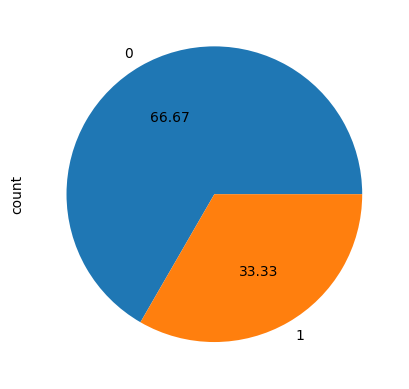

In [10]:
data['Churn'].value_counts().plot.pie(autopct='%.2f')

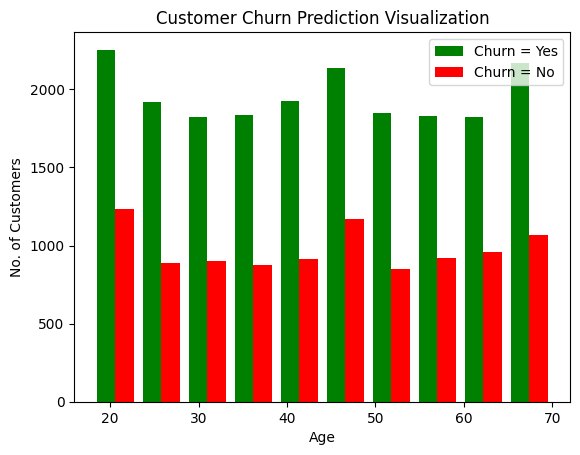

In [11]:
churn_no = data[data.Churn == 0].Age
churn_yes = data[data.Churn == 1].Age
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([churn_no, churn_yes], color=['green','red'], label=['Churn = Yes','Churn = No'])
plt.legend()

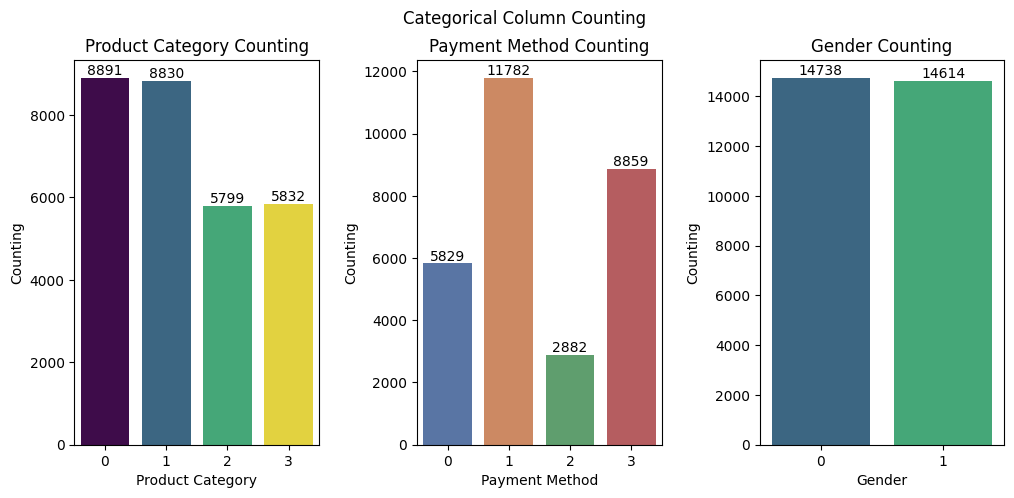

In [12]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(131)
ax = sns.countplot(data=data, x='Product Category',hue='Product Category', palette='viridis',legend=False)
ax.set(title='Product Category Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)


fig.add_subplot(132)
ax = sns.countplot(data=data, x='Payment Method',hue='Payment Method', palette='deep',legend=False)
ax.set(title='Payment Method Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)

fig.add_subplot(133)
ax = sns.countplot(data=data, x='Gender',hue='Gender', palette='viridis',legend=False)
ax.set(title='Gender Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)

plt.subplots_adjust(hspace=.5, wspace=.4)
plt.suptitle('Categorical Column Counting')
plt.show()

In [13]:
# Define features and target variable
X = data.drop(columns=['Churn', 'Customer ID'])
y = data['Churn']

In [14]:
# Split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

def create_random_forest_model():
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    return rf

In [16]:
models = [(create_random_forest_model(), 'Random Forest')]

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, model_name):
    y_pred = model.predict(x_test)
    y_true = y_test 

    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred, average='macro')

    recall = recall_score(y_true, y_pred, average='macro')

    f1 = f1_score(y_true, y_pred, average='macro' )

    return model_name, accuracy, precision, recall, f1

In [18]:
evaluate_rows = []
for (model, model_name) in models:
    evaluate_rows.append(evaluate_model(model, model_name))

result = pd.DataFrame(evaluate_rows, columns=['Algorithm','Accuracy','Precision','Recall','F1'])
result

,Algorithm,Accuracy,Precision,Recall,F1
0,Random Forest,0.659172,0.540848,0.505178,0.428902


In [19]:
import pickle

with open('./model.pkl','wb') as file:
    pickle.dump(model,file)